In [1]:
import pandas as pd
train_df = pd.read_csv("train.csv", encoding="utf-8")
test_df = pd.read_csv("test.csv", encoding="utf-8")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
train_df.median()

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [3]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
# 數值: 中位數
med = train_df.median()
train_df = train_df.fillna(med)
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# !!! 測試資料不要重算趨勢
test_df = test_df.fillna(med)
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [7]:
# 類型: 最常出現的
most = train_df["Embarked"].value_counts().idxmax()
train_df["Embarked"] = train_df["Embarked"].fillna(most)
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [8]:
test_df["Embarked"] = test_df["Embarked"].fillna(most)
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [9]:
dummy = pd.get_dummies(train_df["Embarked"])
train_df = pd.concat([train_df, dummy], axis=1)
dummy = pd.get_dummies(test_df["Embarked"])
test_df = pd.concat([test_df, dummy], axis=1)
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,0,0,1


In [10]:
dummy = pd.get_dummies(train_df["Sex"])
train_df = pd.concat([train_df, dummy], axis=1)
dummy = pd.get_dummies(test_df["Sex"])
test_df = pd.concat([test_df, dummy], axis=1)
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,0,0,1,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,0,1,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,1,0,1
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,0,0,1,0,1


In [11]:
# Demo 1 cell
s = "Braund, Mr. Owen Harris"
s.split(",")[-1].split(".")[0].replace(" ", "")

'Mr'

In [12]:
def nameflow(s):
    return s.split(",")[-1].split(".")[0].replace(" ", "")
train_df["Name"].apply(nameflow).value_counts()

Mr             517
Miss           182
Mrs            125
Master          40
Dr               7
Rev              6
Col              2
Major            2
Mlle             2
Mme              1
Don              1
Lady             1
theCountess      1
Ms               1
Sir              1
Jonkheer         1
Capt             1
Name: Name, dtype: int64

In [13]:
def nameflow(s):
    reserved = ["Mr", "Mrs", "Miss", "Master"]
    mid = s.split(",")[-1].split(".")[0].replace(" ", "")
    if mid in reserved:
        return mid
    else:
        return "X"
dummy = pd.get_dummies(train_df["Name"].apply(nameflow))
train_df = pd.concat([train_df, dummy], axis=1)
dummy = pd.get_dummies(test_df["Name"].apply(nameflow))
test_df = pd.concat([test_df, dummy], axis=1)
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,C,Q,S,female,male,Master,Miss,Mr,Mrs,X
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,0,1,0,0,1,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0,0,1,1,0,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,1,0,0,1,0,0,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,0,0,1,0,1,0,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,...,0,0,1,0,1,0,0,1,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,...,1,0,0,1,0,0,0,0,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,0,0,1,0,1,0,0,1,0,0
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,...,0,0,1,0,1,0,0,1,0,0


In [14]:
# train_df.columns
train = train_df.drop(["PassengerId", "Name", "Sex",
                       "Ticket", "Cabin", "Embarked", "X"],
                       axis=1)
x_train = train.drop(["Survived"], axis=1)
y_train = train["Survived"]

In [15]:
# 訓練題目
x_train

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Master,Miss,Mr,Mrs
0,3,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,0,1
2,3,26.0,0,0,7.9250,0,0,1,1,0,0,1,0,0
3,1,35.0,1,0,53.1000,0,0,1,1,0,0,0,0,1
4,3,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,0,1,0,1,0,0,0,0
887,1,19.0,0,0,30.0000,0,0,1,1,0,0,1,0,0
888,3,28.0,1,2,23.4500,0,0,1,1,0,0,1,0,0
889,1,26.0,0,0,30.0000,1,0,0,0,1,0,0,1,0


In [16]:
# 訓練題目
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [17]:
test = test_df.drop(["Name", "Sex",
                     "Ticket", "Cabin", "Embarked", "X"],
                      axis=1)
x_test = test.drop(["PassengerId"], axis=1)
testid = test["PassengerId"]

In [18]:
# 要填答案的題目
x_test

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Master,Miss,Mr,Mrs
0,3,34.5,0,0,7.8292,0,1,0,0,1,0,0,1,0
1,3,47.0,1,0,7.0000,0,0,1,1,0,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,0,1,0,0,1,0
3,3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1,0
4,3,22.0,1,1,12.2875,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,28.0,0,0,8.0500,0,0,1,0,1,0,0,1,0
414,1,39.0,0,0,108.9000,1,0,0,1,0,0,0,0,0
415,3,38.5,0,0,7.2500,0,0,1,0,1,0,0,1,0
416,3,28.0,0,0,8.0500,0,0,1,0,1,0,0,1,0


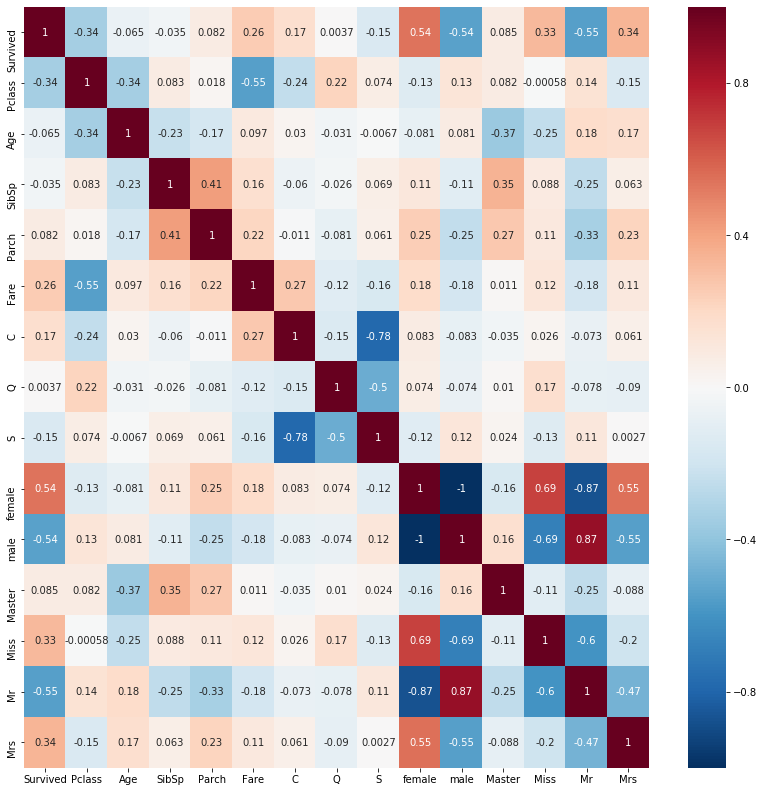

In [19]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(14, 14))
sns.heatmap(train.corr(),
            annot=True,
            cmap="RdBu_r")

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
p = {
    "n_estimators":range(25, 45),
    "max_depth":range(6, 8)
}
cv = GridSearchCV(clf, p, cv=10)
cv.fit(x_train, y_train)
print("最好參數:", cv.best_params_)
print("最好分數:", cv.best_score_)

最好參數: {'max_depth': 6, 'n_estimators': 35}
最好分數: 0.8395061728395061


In [98]:
from sklearn.model_selection import cross_val_score
import numpy as np
clf = RandomForestClassifier(n_estimators=30, max_depth=6)
score = cross_val_score(clf, x_train, y_train, cv=10)
print("十次分數:", score)
print("平均分數:", np.average(score))

十次分數: [0.78888889 0.85555556 0.78651685 0.87640449 0.86516854 0.79775281
 0.82022472 0.7752809  0.84269663 0.85227273]
平均分數: 0.8260762115537397


In [104]:
clf = RandomForestClassifier(n_estimators=30, max_depth=6)
clf.fit(x_train, y_train)
pre = clf.predict(x_test)
pre

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [105]:
result = pd.DataFrame({
    "PassengerId":testid,
    "Survived":pre
})
result.to_csv("titanic.csv", encoding="utf-8", index=False)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
